High Density Regions can be used to find cross sections across a multi-dimensional space that have the highest concentrations of data points. It can also be used to compute the average value of an aggregate statistic with respect to a target variable.

In [8]:
import hdre
import numpy as np
import pandas as pd


import re
df = pd.read_csv('../data/Pokemon.csv').fillna('')
types = np.concatenate([df['Type 1'].unique(),df['Type 2'].unique()])
df['Type']=df[['Type 1','Type 2']].apply(lambda x: str(x[0])+str(x[1]),axis=1)
df.drop(['Type 1','Type 2'],axis=1,inplace=True)
df['Mega'] = df.Name.apply(lambda x: len(re.findall('Mega',x))>0).astype(np.int)
df['Grass'] = df.Type.apply(lambda x: len(re.findall('Grass',x))>0).astype(np.int)

features = np.array(['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def','Speed'])

y = df[features].fillna(0).values.astype(np.float)



model = hdre.region_estimator.DensityFactorization(number_of_clusters=24,bins_per_dimension=61, smoothing_parameter=3.0)

#agg_func: 'mean', 'variance', 'max', 'false-positive-cost', 'false-negative-cost', 'count'
model.optimize(X=y,y=y, number_of_random_simulations=100, 
               number_of_realizations=20,
                 agg_func='count')



realization 0 loss 168.78808539194594 time 2.002873659133911
realization 1 loss 141.16565720723636 time 1.737499475479126
realization 2 loss 117.89088736881939 time 1.865955114364624
realization 3 loss 93.95654415742445 time 1.9142351150512695
realization 4 loss 78.54086274565114 time 2.0656490325927734
realization 5 loss 66.10023583116997 time 1.939302682876587
realization 6 loss 59.33479993020532 time 2.2081105709075928
realization 7 loss 52.86090095662868 time 1.8919439315795898
realization 8 loss 48.512359309436725 time 1.980684518814087
realization 9 loss 37.07014779722252 time 1.9408202171325684
realization 10 loss 35.020405678681584 time 1.9881792068481445
realization 11 loss 30.966568783528174 time 1.7810444831848145
realization 12 loss 27.471736653870042 time 1.9009838104248047
realization 13 loss 25.49869993625223 time 2.017601251602173
realization 14 loss 24.193991792487182 time 2.1488375663757324
realization 15 loss 23.892473110007252 time 2.032628297805786
realization 16 l

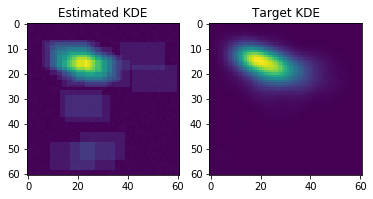

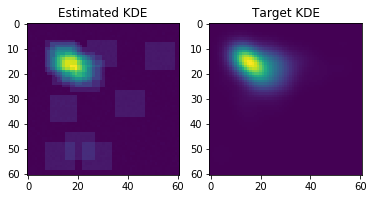

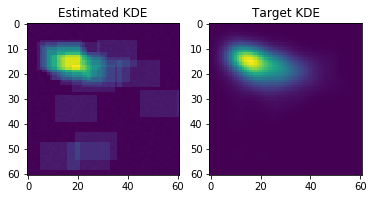

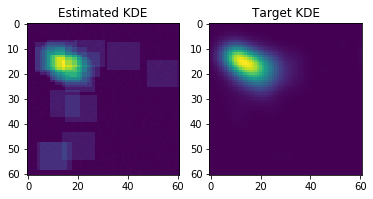

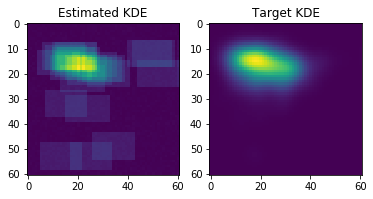

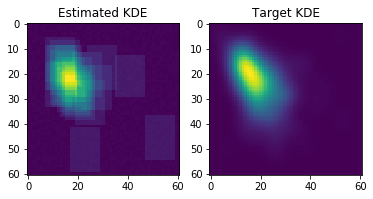

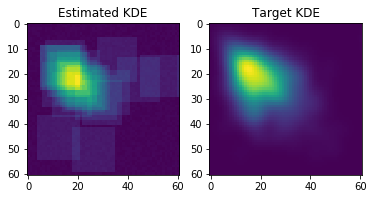

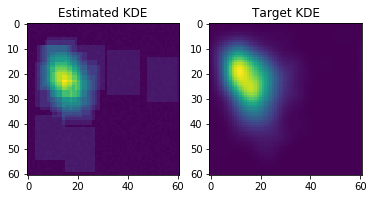

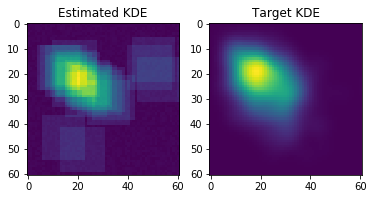

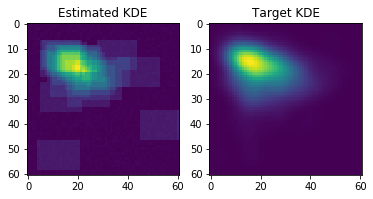

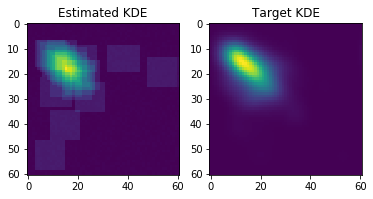

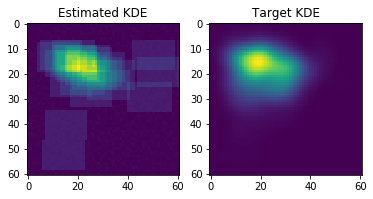

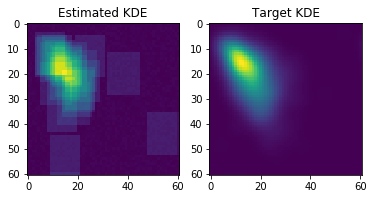

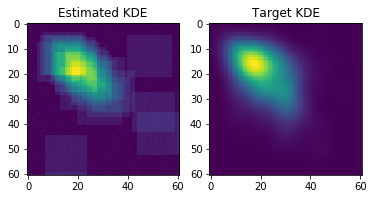

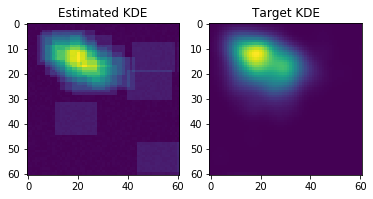

In [4]:
#inspect distributions
import matplotlib.pyplot as plt
count=0
for i,j in model.dim_combos:
    
    plt.subplot(1,2,1)
    plt.imshow(model.kde_estimate[count])
    plt.title('Estimated KDE')

#     plt.show()
    plt.subplot(1,2,2)
    plt.imshow(model.kde_target[count])
    plt.title('Target KDE')
    plt.show()
    count+=1

In [9]:
#choose pad value and prune clusters with fewer data points than the limit
pad=1.25
model.prune_clusters(y,pad=pad,limit=20)

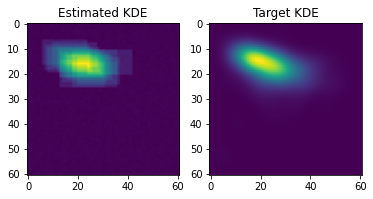

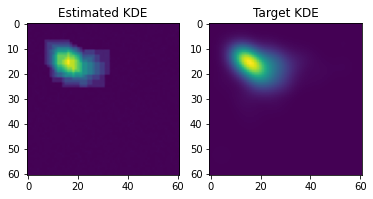

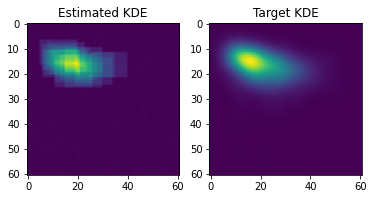

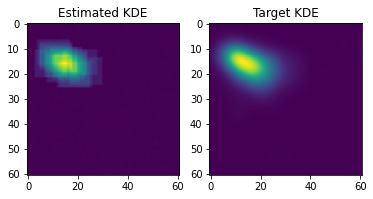

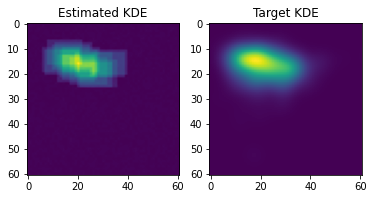

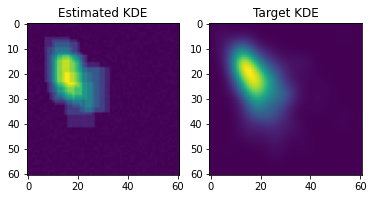

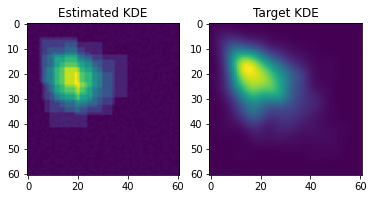

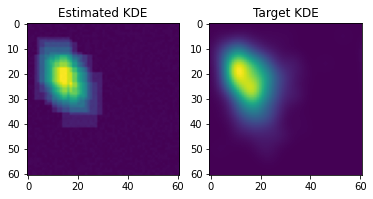

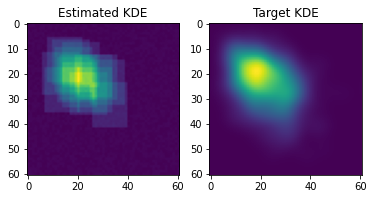

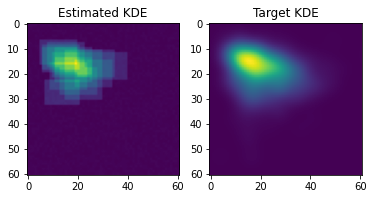

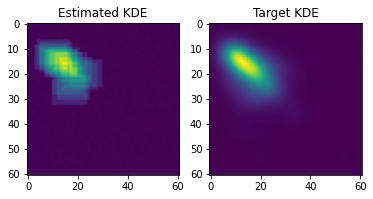

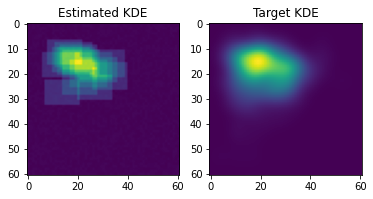

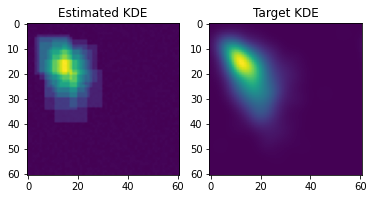

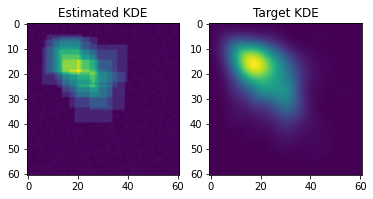

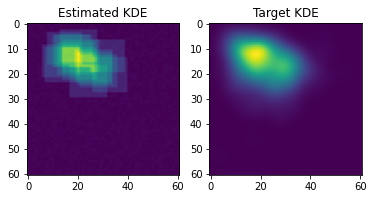

In [10]:
#inspect distributions
import matplotlib.pyplot as plt
count=0
for i,j in model.dim_combos:
    
    plt.subplot(1,2,1)
    plt.imshow(model.kde_estimate[count])
    plt.title('Estimated KDE')

#     plt.show()
    plt.subplot(1,2,2)
    plt.imshow(model.kde_target[count])
    plt.title('Target KDE')
    plt.show()
    count+=1

In [11]:
#get assignments
model.get_assignments(y,pad=pad)

array([[False, False,  True, ..., False, False,  True],
       [False, False, False, ..., False, False, False],
       [False, False, False, ...,  True, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [12]:
pad=3.0
assignments = model.get_assignments(y,pad=pad)
#compute distances: 'chebyshev','euclidian','mae'
distances = model.get_distances(y,pad=pad,distance='chebyshev')

In [13]:
#number of assignements per cluster
np.sum(assignments,axis=0)

array([708, 700, 650, 641, 711, 766, 644, 715, 721, 744, 684, 754, 760,
       631, 592])

In [14]:
#how many data points are in all clusters
np.sum(np.sum(assignments,axis=1)==model.num_clusters)

476

In [15]:
#how many data points not in clusters
np.sum(np.sum(assignments,axis=1)==0)

15

In [17]:
model.optimize(X=y,y=y, number_of_random_simulations=100, 
               number_of_realizations=10,
                 agg_func='count')

realization 0 loss 32.762404841653805 time 1.7333006858825684
realization 1 loss 28.670034494640625 time 1.4539990425109863
realization 2 loss 27.59850992716771 time 1.4983487129211426
realization 3 loss 26.926888835425384 time 1.5211212635040283
realization 4 loss 22.839737028308768 time 1.4209988117218018
realization 5 loss 20.877715980435326 time 1.3003828525543213
realization 6 loss 20.54128790761722 time 1.4153759479522705
realization 7 loss 20.302217171203573 time 1.2645974159240723
realization 8 loss 20.250451967970836 time 1.5383565425872803
realization 9 loss 18.55648170098178 time 1.3336293697357178


In [18]:
#cluster centroids and deviations
centroids = model.centroids_
deviations = model.deviations_

In [19]:
#outliers
pad=3.
assignments = model.get_assignments(y,pad=pad)

df[np.sum(assignments,axis=1)<1]

,#,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type,Mega,Grass
223,208,Steelix,510,75,85,200,55,65,30,2,False,SteelGround,0,0
224,208,SteelixMega Steelix,610,75,125,230,55,95,30,2,False,SteelGround,1,0
230,213,Shuckle,505,20,10,230,10,230,5,2,False,BugRock,0,0
333,306,AggronMega Aggron,630,70,140,230,60,80,50,3,False,Steel,1,0
414,377,Regirock,580,80,100,200,50,100,50,3,True,Rock,0,0


In [20]:
pad=1.
model.prune_clusters(y,pad=pad,limit=20)
assignments = model.get_assignments(y,pad=pad)



lower = np.percentile(df[features].values,5,axis=0)
upper = np.percentile(df[features].values,95,axis=0)

mean_values = []
for k in range(model.num_clusters):
    view = df[assignments[:,k]==1][features].clip(lower,upper,axis=1)
    mean_values.append(view.mean().values.reshape(-1,1))
mean_values=np.hstack(mean_values).T
# mean_values=(mean_values-lower)/(upper-lower)
np.round(mean_values,2),features

(array([[ 70.94,  82.12,  86.21,  68.09,  85.5 ,  90.97],
        [ 76.54,  83.62,  94.79, 110.96,  82.62,  68.04],
        [ 48.88,  51.97,  51.71,  47.66,  48.98,  47.06],
        [ 53.86,  58.79,  52.65,  55.59,  56.68,  58.73],
        [ 84.44, 128.54,  79.96,  73.04,  79.76,  79.2 ],
        [ 50.44,  62.29,  50.28,  50.01,  50.98,  65.95],
        [ 65.26,  93.43,  71.3 ,  54.08,  58.45,  55.34],
        [ 55.9 ,  64.83,  48.97,  64.5 ,  52.13,  94.03],
        [ 57.36,  61.2 ,  53.8 ,  61.48,  57.2 ,  51.77],
        [ 72.66,  83.96,  69.07,  98.8 ,  77.02,  94.05],
        [ 72.33,  86.92,  75.71,  97.88,  67.54,  59.29]]),
 array(['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'],
       dtype='<U7'))

In [21]:
mean_values = mean_values/np.sum(mean_values,axis=0)
mean_values = mean_values/np.sum(mean_values,axis=1).reshape(-1,1)

In [22]:
np.round(mean_values,2)

array([[0.16, 0.15, 0.18, 0.14, 0.19, 0.19],
       [0.16, 0.14, 0.19, 0.21, 0.17, 0.13],
       [0.18, 0.16, 0.18, 0.16, 0.17, 0.16],
       [0.17, 0.15, 0.16, 0.16, 0.18, 0.17],
       [0.17, 0.22, 0.16, 0.14, 0.16, 0.15],
       [0.16, 0.17, 0.16, 0.15, 0.16, 0.2 ],
       [0.18, 0.21, 0.19, 0.13, 0.16, 0.14],
       [0.16, 0.15, 0.13, 0.17, 0.15, 0.25],
       [0.18, 0.16, 0.16, 0.17, 0.18, 0.15],
       [0.16, 0.15, 0.14, 0.19, 0.16, 0.19],
       [0.17, 0.17, 0.17, 0.21, 0.16, 0.13]])

In [23]:
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

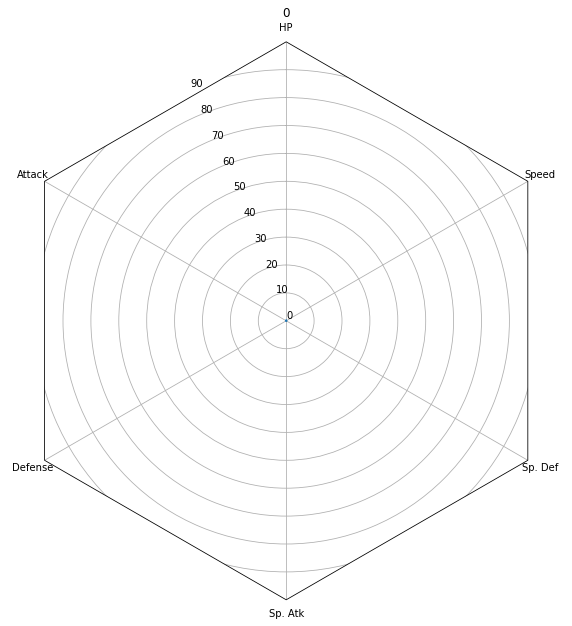

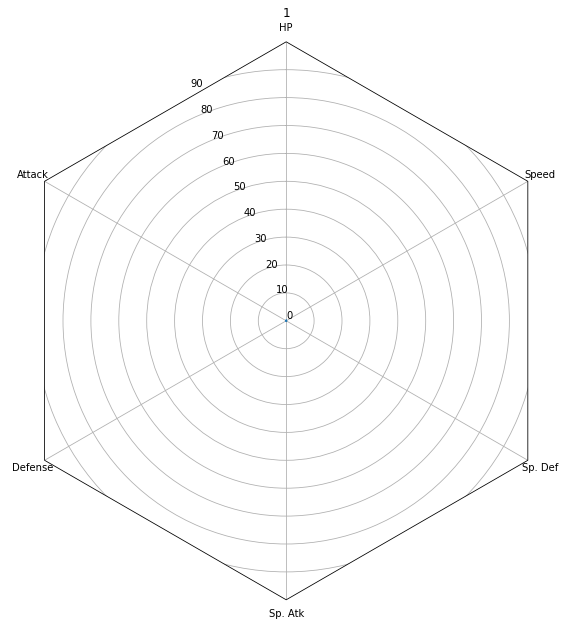

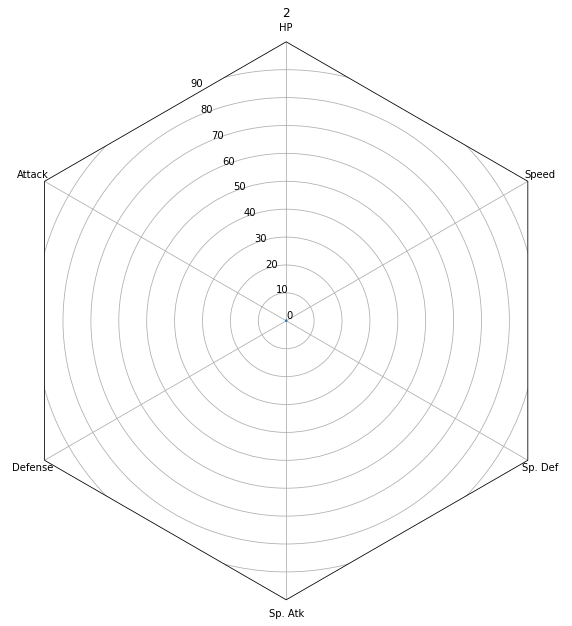

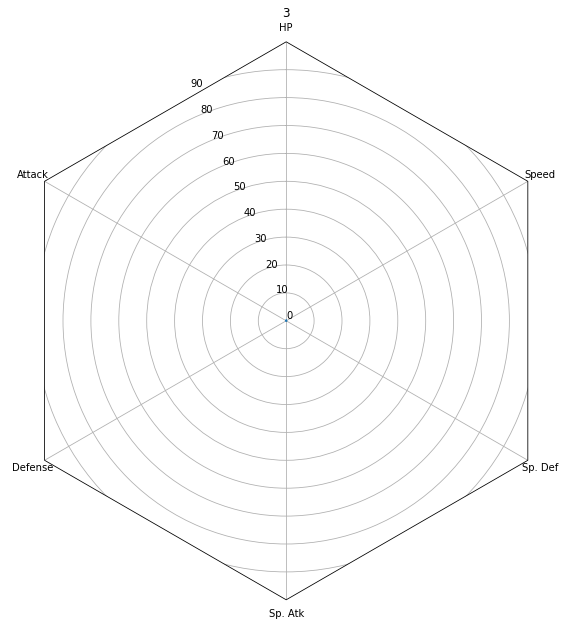

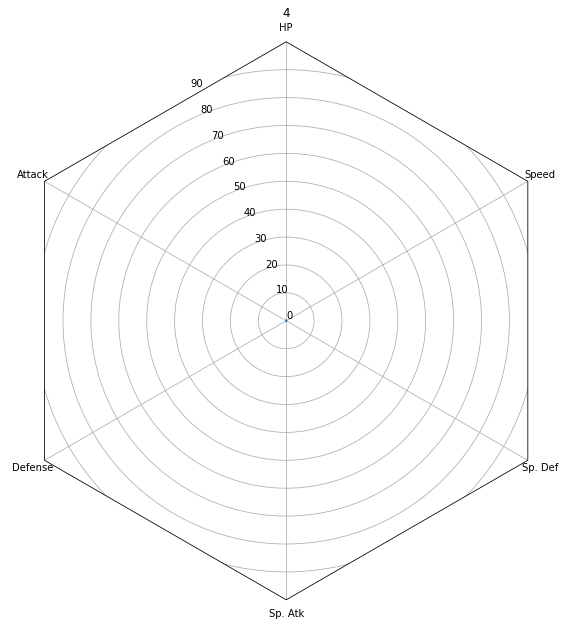

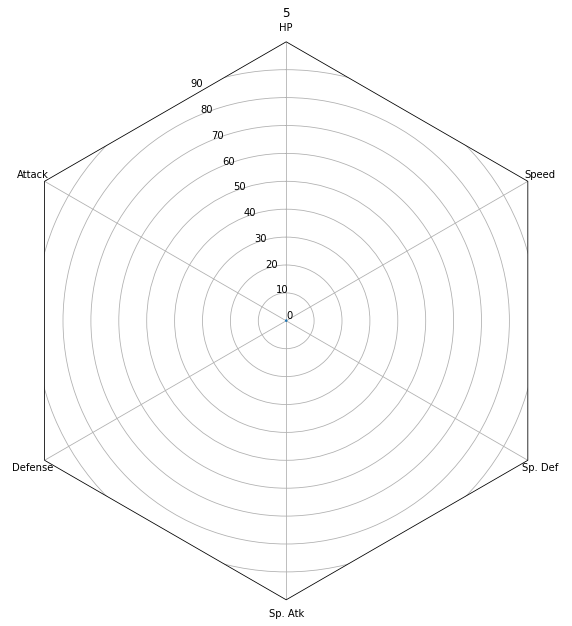

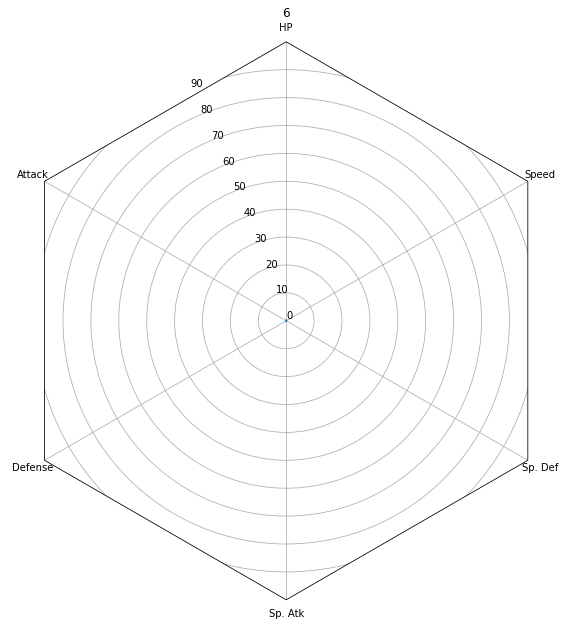

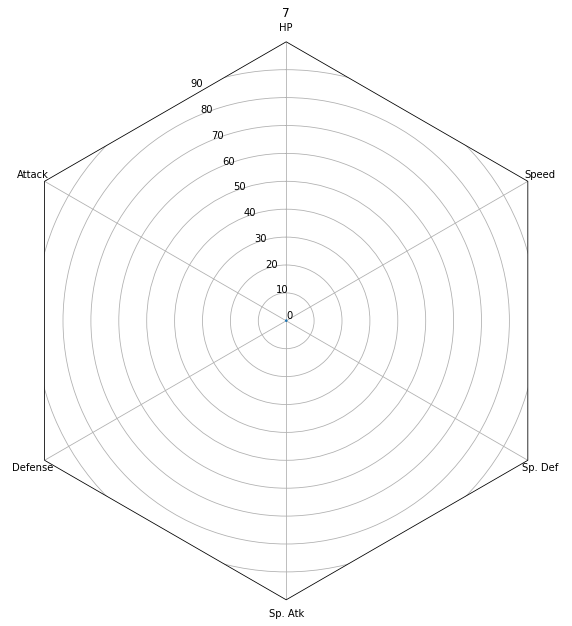

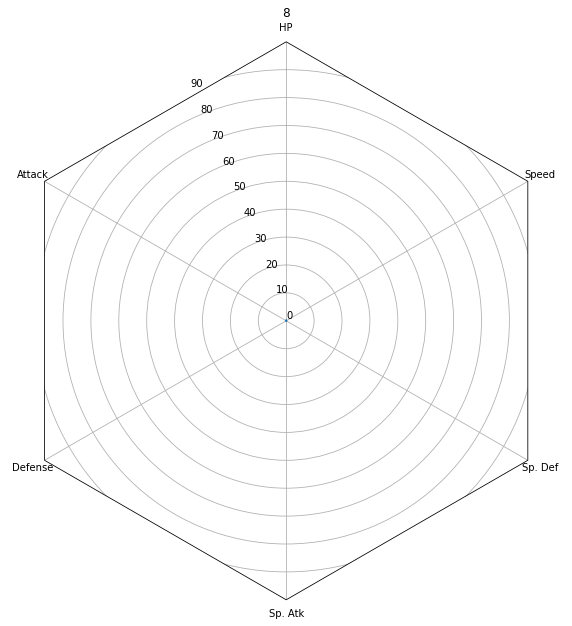

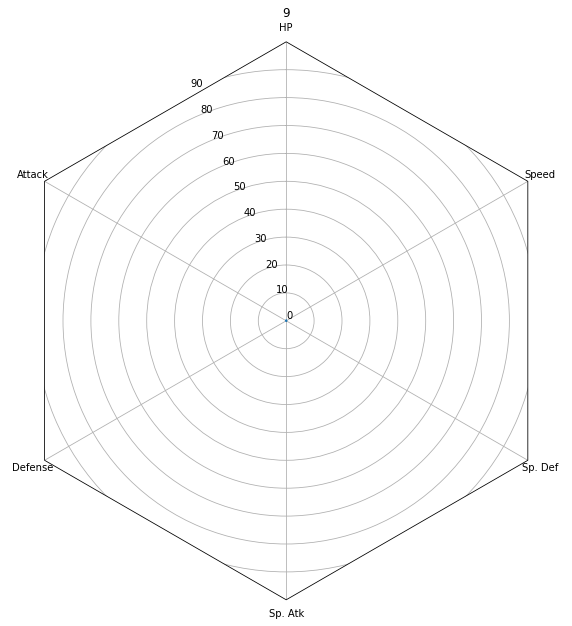

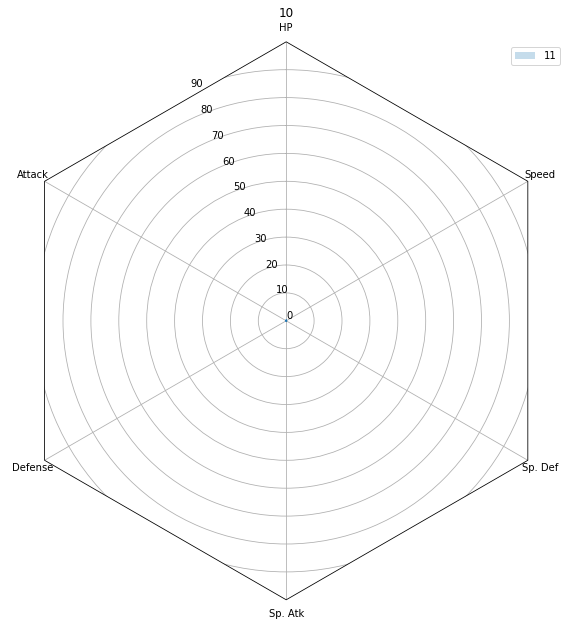

In [24]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D


def radar_factory(num_vars, frame='circle'):
    """Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle' | 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarAxes(PolarAxes):

        name = 'radar'

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.concatenate((x, [x[0]]))
                y = np.concatenate((y, [y[0]]))
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)

        def draw(self, renderer):
            """ Draw. If frame is polygon, make gridlines polygon-shaped """
            if frame == 'polygon':
                gridlines = self.yaxis.get_gridlines()
                for gl in gridlines:
                    gl.get_path()._interpolation_steps = num_vars
            super().draw(renderer)


        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)


                return {'polar': spine}
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta



N = mean_values.shape[0]
theta = radar_factory(N, frame='polygon')

spoke_labels = view[features].columns

tmp = mean_values

N = len(features)
theta = radar_factory(N, frame='polygon')

for d in range(tmp.shape[0]):
    
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='radar'))
    fig.subplots_adjust(top=0.85, bottom=0.05)
    ax.set_rgrids(np.linspace(0,90,10))

    title = str(d)

    ax.set_title(title,  position=(0.5, 1.1), ha='center')
    line = ax.plot(theta, tmp[d])
    ax.set_rlim(0,100)
    ax.fill(theta, tmp[d],  alpha=0.25,label=d+1)
    ax.set_varlabels(spoke_labels)

plt.legend()
plt.show()

In [25]:
df[assignments[:,5]==1].head()

,#,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type,Mega,Grass
0,1,Bulbasaur,318,45,49,49,65,65,45,1,False,GrassPoison,0,1
4,4,Charmander,309,39,52,43,60,50,65,1,False,Fire,0,0
18,15,Beedrill,395,65,90,40,45,80,75,1,False,BugPoison,0,0
20,16,Pidgey,251,40,45,40,35,35,56,1,False,NormalFlying,0,0
21,17,Pidgeotto,349,63,60,55,50,50,71,1,False,NormalFlying,0,0


In [26]:
df[assignments[:,1]==1].head()

,#,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type,Mega,Grass
2,3,Venusaur,525,80,82,83,100,100,80,1,False,GrassPoison,0,1
50,45,Vileplume,490,75,80,85,110,90,50,1,False,GrassPoison,0,1
60,55,Golduck,500,80,82,78,95,80,85,1,False,Water,0,0
64,59,Arcanine,555,90,110,80,100,80,95,1,False,Fire,0,0
89,82,Magneton,465,50,60,95,120,70,70,1,False,ElectricSteel,0,0
